In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
df = pd.read_pickle("../../datasets/processed/laptop_price.pkl")

In [3]:
df.head()

,company,product,typename,inches,screen_resolution,cpu_manufacturer,cpu,gpu_manufacturer,gpu,ram_gb,hdd_gb,ssd_gb,hybrid_gb,flash_storage_gb,opsys,weight_kg,price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel,Intel Core i5 2.3GHz,Intel,Intel Iris Plus Graphics 640,8,0,128,0,0,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Intel Core i5 1.8GHz,Intel,Intel HD Graphics 6000,8,0,0,0,128,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,1920x1080,Intel,Intel Core i5 7200U 2.5GHz,Intel,Intel HD Graphics 620,8,0,256,0,0,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel,Intel Core i7 2.7GHz,AMD,AMD Radeon Pro 455,16,0,512,0,0,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel,Intel Core i5 3.1GHz,Intel,Intel Iris Plus Graphics 650,8,0,256,0,0,macOS,1.37,1803.60


In [4]:
df.describe()

,inches,ram_gb,hdd_gb,ssd_gb,hybrid_gb,flash_storage_gb,weight_kg,price_euros
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017190,8.382195,413.783576,183.732924,8.831926,4.555641,2.038734,1123.686992
std,1.426304,5.084665,515.818779,186.966903,92.567185,30.274090,0.665475,699.009043
min,10.100000,2.000000,0.000000,0.000000,0.000000,0.000000,0.690000,174.000000
25%,14.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.500000,599.000000
50%,15.600000,8.000000,0.000000,256.000000,0.000000,0.000000,2.040000,977.000000
75%,15.600000,8.000000,1000.000000,256.000000,0.000000,0.000000,2.300000,1487.880000
max,18.400000,64.000000,2000.000000,1024.000000,1000.000000,512.000000,4.700000,6099.000000


In [5]:
df.sort_values(by=['price_euros'], ascending=False).head()

,company,product,typename,inches,screen_resolution,cpu_manufacturer,cpu,gpu_manufacturer,gpu,ram_gb,hdd_gb,ssd_gb,hybrid_gb,flash_storage_gb,opsys,weight_kg,price_euros
196,Razer,Blade Pro,Gaming,17.299999,3840x2160,Intel,Intel Core i7 7820HK 2.9GHz,Nvidia,Nvidia GeForce GTX 1080,32,0,1000,0,0,Windows 10,3.49,6099.0
830,Razer,Blade Pro,Gaming,17.299999,3840x2160,Intel,Intel Core i7 7820HK 2.9GHz,Nvidia,Nvidia GeForce GTX 1080,32,0,512,0,0,Windows 10,3.49,5499.0
610,Lenovo,Thinkpad P51,Notebook,15.600000,3840x2160,Intel,Intel Xeon E3-1535M v6 3.1GHz,Nvidia,Nvidia Quadro M2200M,32,0,1000,0,0,Windows 10,2.50,4899.0
749,HP,Zbook 17,Workstation,17.299999,1920x1080,Intel,Intel Xeon E3-1535M v5 2.9GHz,Nvidia,Nvidia Quadro M2000M,16,0,256,0,0,Windows 7,3.00,4389.0
1066,Asus,ROG G701VO,Gaming,17.299999,1920x1080,Intel,Intel Core i7 6820HK 2.7GHz,Nvidia,Nvidia GeForce GTX 980,64,0,1000,0,0,Windows 10,3.58,3975.0


In [6]:
df.describe(exclude=['float32', 'float64', 'int16', 'uint8'])

,company,product,typename,screen_resolution,cpu_manufacturer,cpu,gpu_manufacturer,gpu,opsys
count,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,618,6,15,3,118,4,110,9
top,Dell,XPS 13,Notebook,1920x1080,Intel,Intel Core i5 7200U 2.5GHz,Intel,Intel HD Graphics 620,Windows 10
freq,297,30,727,841,1240,190,722,281,1072


In [7]:
df.groupby(by=["company"])['price_euros'].mean('price_euros')

company
Acer          626.775825
Apple        1564.198571
Asus         1104.169367
Chuwi         314.296667
Dell         1186.068990
Fujitsu       729.000000
Google       1677.666667
HP           1067.774854
Huawei       1424.000000
LG           2099.000000
Lenovo       1086.384444
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: price_euros, dtype: float64

In [8]:
def bar_plt(df, column, ax):
    sns.histplot(data=df, x=column, ax=ax)
    for value in ax.containers:
        ax.bar_label(value)
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('')

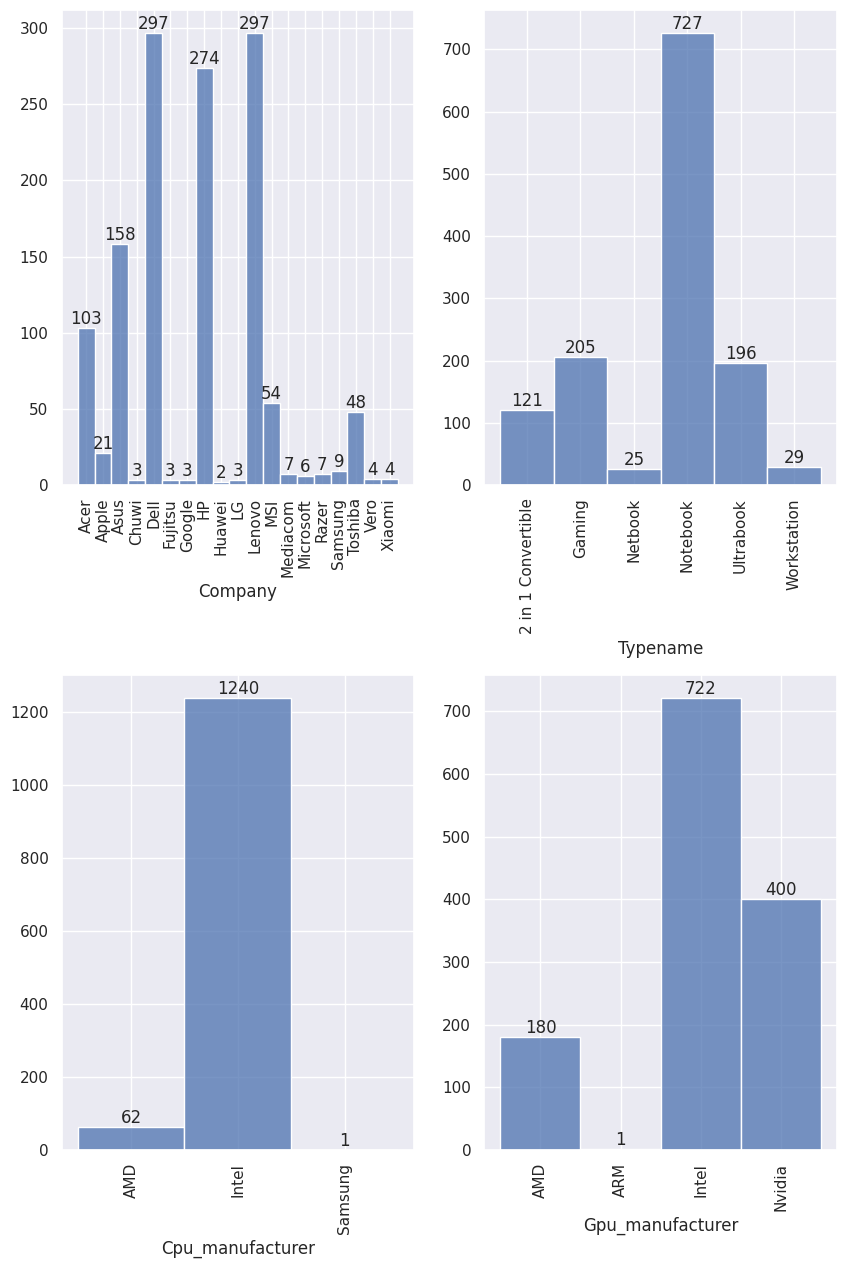

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
bar_plt(df, 'company', ax[0][0])
bar_plt(df, 'typename', ax[0][1])
bar_plt(df, 'cpu_manufacturer', ax[1][0])
bar_plt(df, 'gpu_manufacturer', ax[1][1])
plt.subplots_adjust(hspace=0.4, top=1.25)
plt.show()

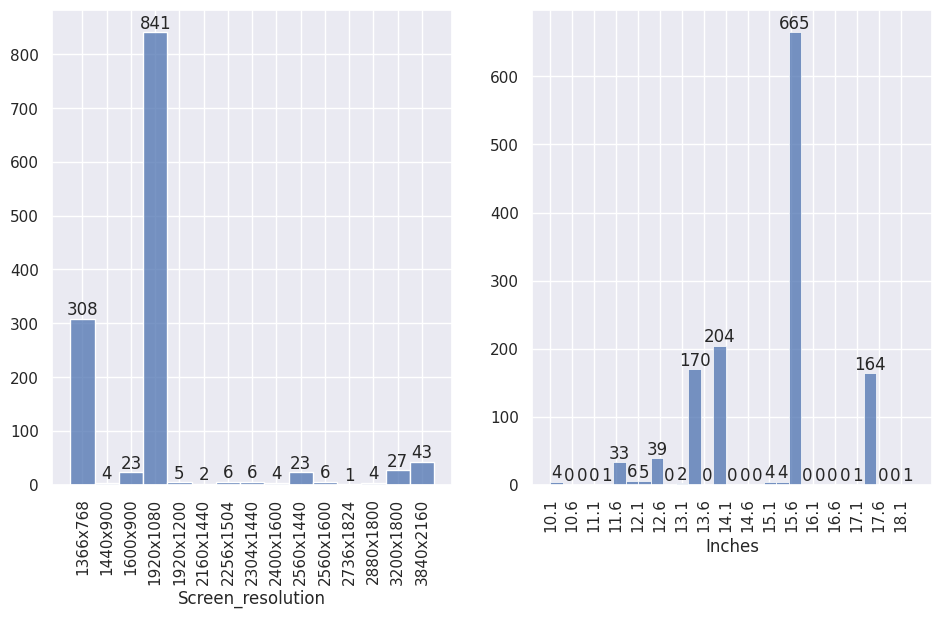

In [10]:
fig, ax = plt.subplots(1,2)
bar_plt(df, 'screen_resolution', ax[0])
bar_plt(df, 'inches', ax[1])
ax[1].set(xticks=np.arange(df.inches.min(), df.inches.max(), 0.5))
plt.subplots_adjust(right=1.5, top=1.1)
plt.show()

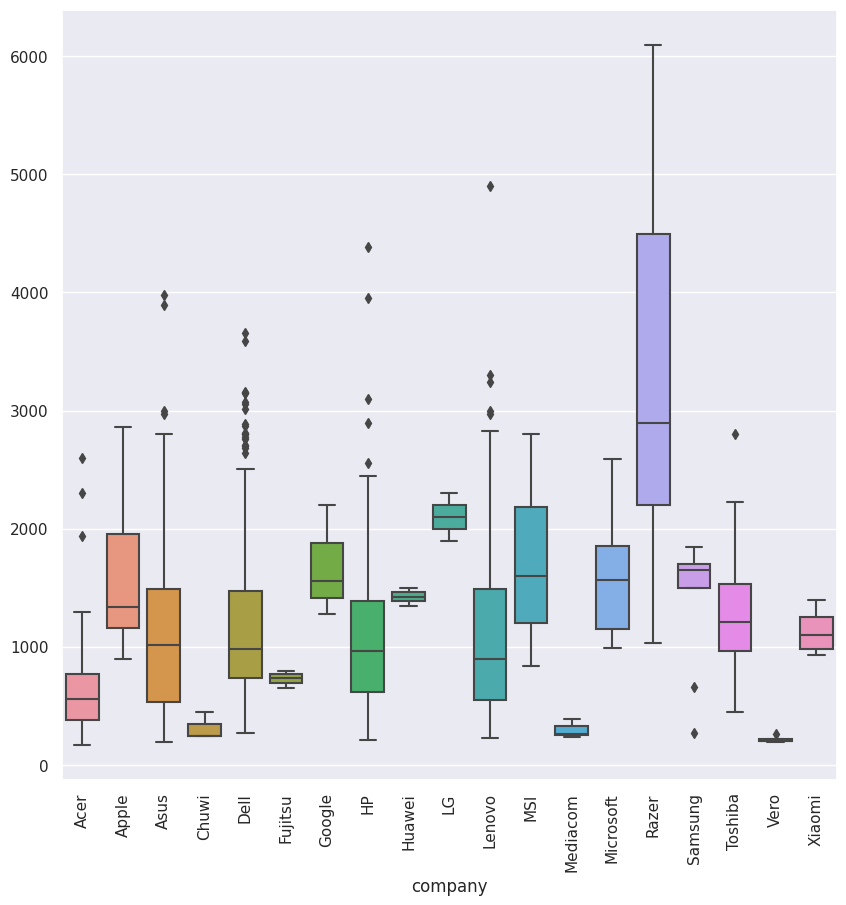

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data=df, x="company", y="price_euros", ax=ax)
plt.xticks(rotation='vertical')
plt.ylabel('')
plt.show()

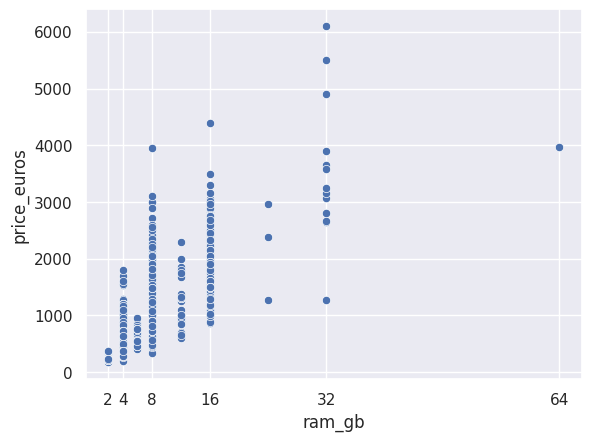

In [12]:
ax = sns.scatterplot(data=df, x = "ram_gb", y = "price_euros")
ax.set(xticks=[(2**n) for n in np.arange(1, 7)])
plt.show()

[]

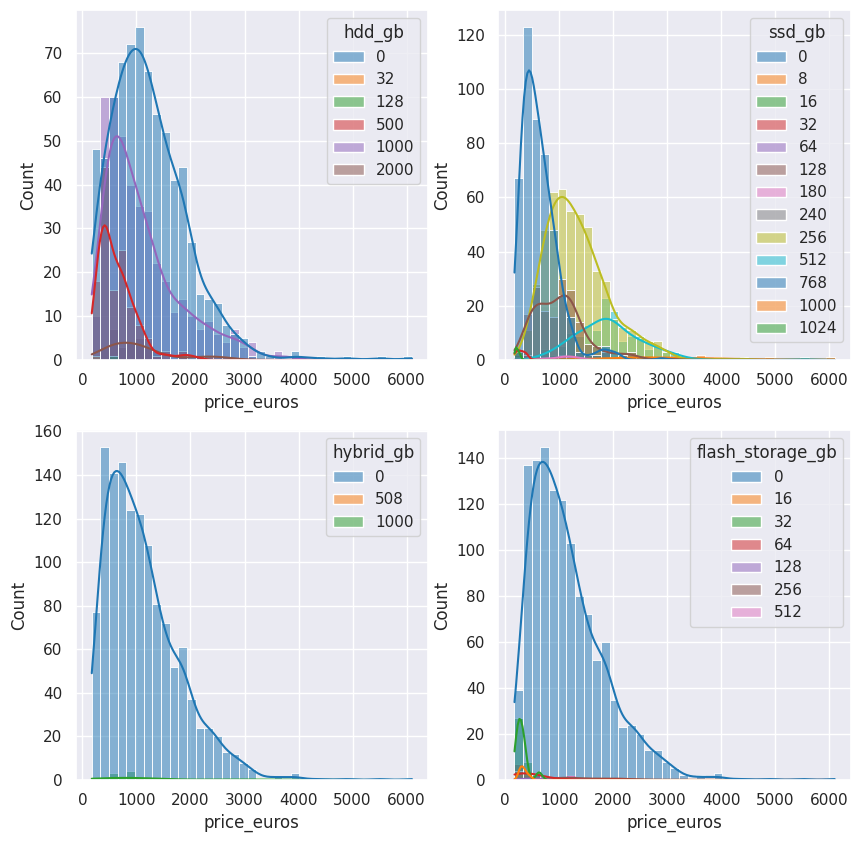

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

items = {'hdd_gb': ax[0][0],
        'ssd_gb': ax[0][1],
        'hybrid_gb': ax[1][0],
        'flash_storage_gb': ax[1][1]
}
for item, ax in items.items():
    sns.histplot(data=df, x='price_euros', hue=item, ax=ax, kde=True, palette="tab10")
plt.plot()

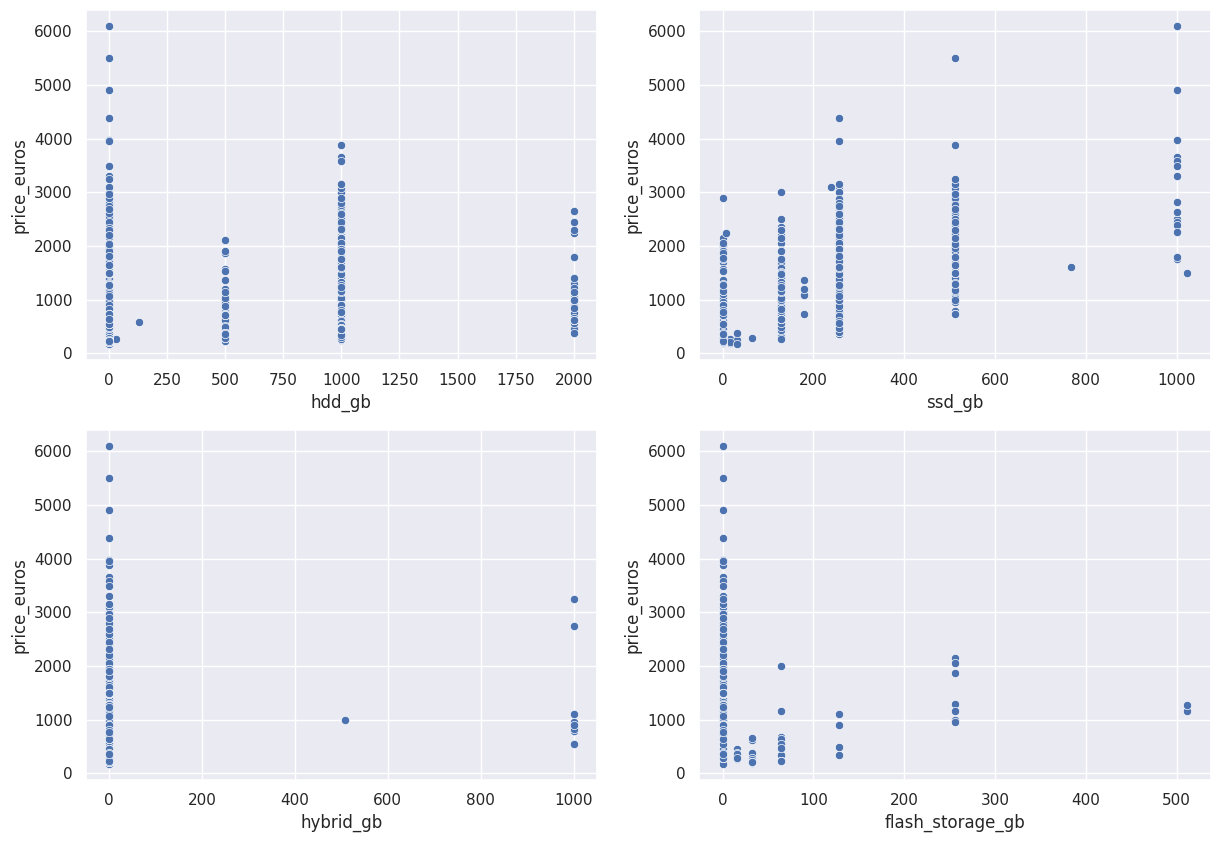

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

items = {'hdd_gb': ax[0][0],
        'ssd_gb': ax[0][1],
        'hybrid_gb': ax[1][0],
        'flash_storage_gb': ax[1][1]
}

for coluna, ax in items.items():
    ax = sns.scatterplot(data=df, x=coluna, y="price_euros", ax=ax)

plt.subplots_adjust(right=1.25)
plt.show()

[]

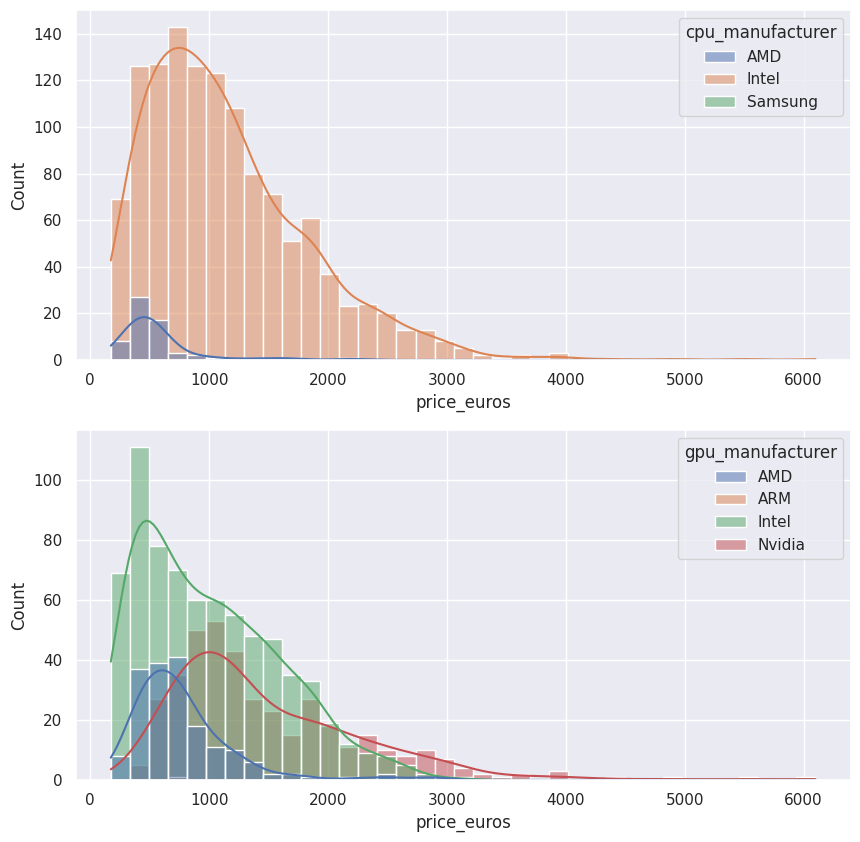

In [15]:
fig, ax = plt.subplots(2, figsize=(10, 10))

valores = {'cpu_manufacturer': ax[0], 
            'gpu_manufacturer': ax[1]
}
for item, ax in valores.items():
    sns.histplot(data=df, x='price_euros', hue=item, ax=ax, kde=True)
plt.plot()

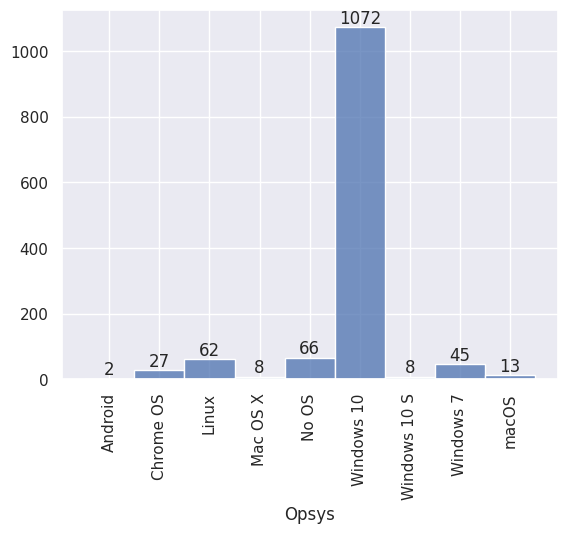

In [16]:
fig, ax = plt.subplots()
bar_plt(df, 'opsys', ax)
plt.show()

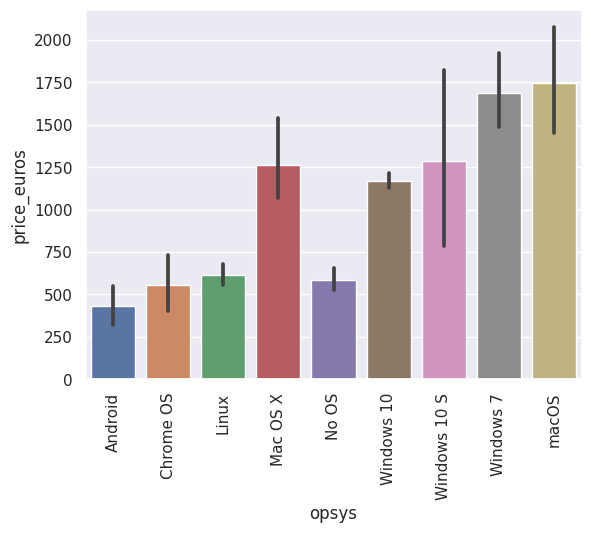

In [17]:
ax = sns.barplot(data=df, x="opsys", y="price_euros")
ax.tick_params(axis='x', labelrotation=90)
plt.show()

In [18]:
df.head()

,company,product,typename,inches,screen_resolution,cpu_manufacturer,cpu,gpu_manufacturer,gpu,ram_gb,hdd_gb,ssd_gb,hybrid_gb,flash_storage_gb,opsys,weight_kg,price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel,Intel Core i5 2.3GHz,Intel,Intel Iris Plus Graphics 640,8,0,128,0,0,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Intel Core i5 1.8GHz,Intel,Intel HD Graphics 6000,8,0,0,0,128,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,1920x1080,Intel,Intel Core i5 7200U 2.5GHz,Intel,Intel HD Graphics 620,8,0,256,0,0,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel,Intel Core i7 2.7GHz,AMD,AMD Radeon Pro 455,16,0,512,0,0,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel,Intel Core i5 3.1GHz,Intel,Intel Iris Plus Graphics 650,8,0,256,0,0,macOS,1.37,1803.60


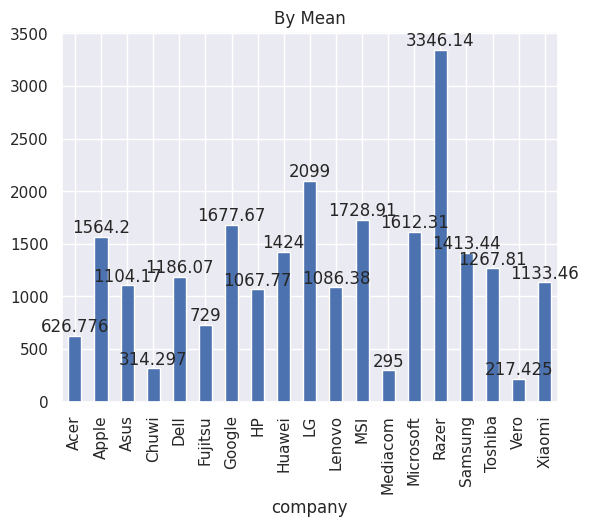

In [19]:
ax = df.groupby(by='company')['price_euros'].mean().plot.bar(rot=90)
for value in ax.containers:
    ax.bar_label(value)
ax.set_title('By Mean')
plt.show()

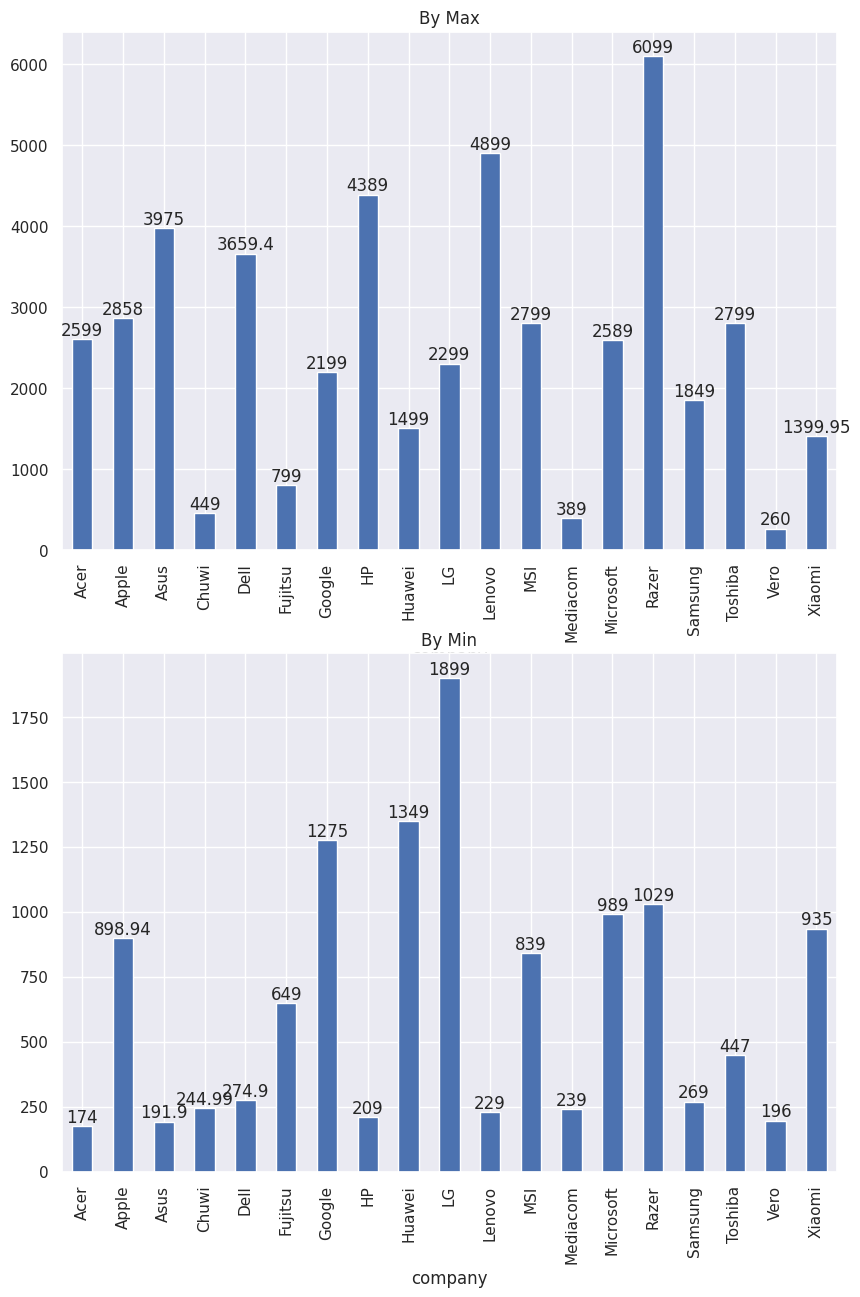

In [20]:
fig, ax = plt.subplots(2, figsize=(10, 10))

items = {
    'max': ax[0],
    'min': ax[1]
}

for item, ax in items.items():
    df.groupby(by='company')['price_euros'].agg(f'{item}').plot.bar(rot=90, ax=ax)
    for value in ax.containers:
        ax.bar_label(value)
    ax.set_title(f'By {item.capitalize()}')    

plt.subplots_adjust(top=1.25)
plt.show()

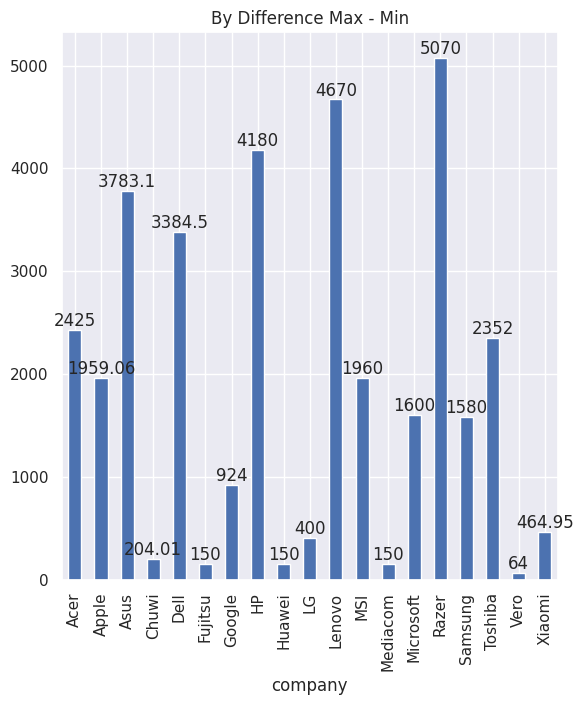

In [23]:
ax = (df.groupby(by='company')['price_euros'].agg('max') - df.groupby(by='company')['price_euros'].agg('min')).plot.bar(rot=90)
for value in ax.containers:
    ax.bar_label(value)
ax.set_title(f'By Difference Max - Min')    

plt.subplots_adjust(top=1.25)
plt.show()

In [ ]:
sns.distplot(df['price_euros'])
plt.show()